# Random forest regression example

As an experiment, we'll look at a dataset uniquely well suited to modeling with random forest regression.

In [195]:
import numpy as np
import pandas as pd

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [197]:
import matplotlib.pyplot as plt

## Generate fake data

In [198]:
n = 2000
df = pd.DataFrame({
        'a': np.random.normal(size=n),
        'b': np.random.normal(size=n),
        'c': np.random.normal(size=n),
        'd': np.random.uniform(size=n),
        'e': np.random.uniform(size=n),
        'f': np.random.choice(list('abc'), size=n, replace=True),
        'g': np.random.choice(list('efghij'), size=n, replace=True),
})
df = pd.get_dummies(df)

In [199]:
df.head()

,a,b,c,d,e,f_a,f_b,f_c,g_e,g_f,g_g,g_h,g_i,g_j
0,0.398080,-0.670779,1.474013,0.135635,0.645646,0,1,0,0,0,0,0,1,0
1,0.318429,-1.708524,0.206905,0.658535,0.705774,0,1,0,0,0,0,0,0,1
2,1.069744,-0.066054,0.509550,0.386003,0.870305,0,1,0,0,0,0,0,0,1
3,0.533863,-1.169192,0.946427,0.752961,0.735945,0,1,0,0,0,0,0,0,1
4,-0.577536,1.226818,2.326454,0.043888,0.298942,1,0,0,1,0,0,0,0,0


The target variable is a little bit complicated. One of the categorical variables is used to select which continuous variable comes into play. 

In [200]:
y = df.a*df.f_a + df.b*df.f_b + df.c*df.f_c + 3*df.d + np.random.normal(scale=1/3, size=n)

## Best possible model

To calibrate our expectations, even if we have perfect insight, there's still some noise involved. How well could we do, in the best case?

In [205]:
y_pred = df.a*df.f_a + df.b*df.f_b + df.c*df.f_c + 3*df.d
r2_score(y, y_pred)

0.9434316495969901

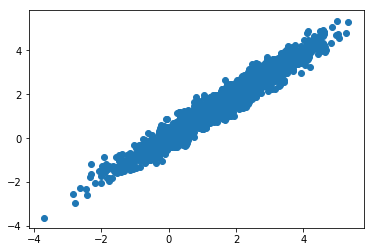

In [206]:
plt.scatter(y, y_pred)

## Model with random forest regression

### Train / test split

In [207]:
i = np.random.choice((1,2,3), size=n, replace=True, p=(3/5,1/5,1/5))

In [208]:
i = np.array([1]*int(3/5*n) + [2]*int(1/5*n) + [3]*int(1/5*n))
np.random.shuffle(i)
len(i) == n

True

In [209]:
df_train = df[i==1]
df_val   = df[i==2]
df_test  = df[i==3]
y_train  = y[i==1]
y_val    = y[i==2]
y_test   = y[i==3]
len(df_train), len(df_val), len(df_test)

(1200, 400, 400)

### Train model

In [210]:
regr = RandomForestRegressor(n_estimators=200, oob_score=True)
regr.fit(df_train, y_train)
print(regr.oob_score_)

0.8194263993219066


Cross-validate to select params *max_depth*, *min_samples_leaf*?

### Predict on test set

In [211]:
y_pred = regr.predict(df_test)

In [212]:
r2_score(y_test, y_pred)

0.800980136448272

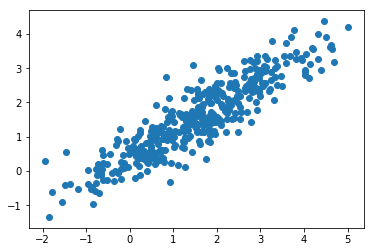

In [213]:
plt.scatter(y_test, y_pred)

## Compare to linear regression

The idea was that random forest could capture the interaction with the categorical variable. If that's true, it should outperform standard linear regression. Let's fit a linear regression to the same data and see how that does.

In [223]:
from sklearn.linear_model import LinearRegression

### Fit

In [224]:
lm = LinearRegression()
lm.fit(df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predict

In [225]:
y_pred = lm.predict(df_test)

### Score and plot

In [226]:
r2_score(y_test, y_pred)

0.541670875052207

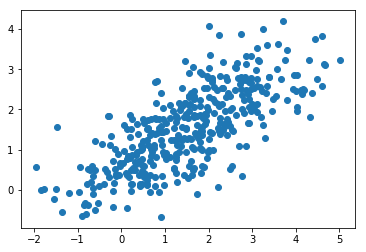

In [227]:
plt.scatter(y_test, y_pred)

## Easy example

In [228]:
n = 2000
df = pd.DataFrame({
        'a': np.random.normal(size=n),
        'b': np.random.normal(size=n),
        'c': np.random.choice(list('xyz'), size=n, replace=True),
})
df = pd.get_dummies(df)
df.head()

,a,b,c_x,c_y,c_z
0,-1.105713,0.216429,0,0,1
1,-0.137628,-0.447680,0,0,1
2,0.269203,-0.673780,0,1,0
3,0.252271,-1.235003,0,0,1
4,-0.965557,-0.489564,0,1,0


In [181]:
y = 0.234*df.a + -0.678*df.b + -0.456*df.c_x + 0.123*df.c_y + 0.811*df.c_z + np.random.normal(scale=1/3, size=n)

In [182]:
i = np.random.choice((1,2,3), size=n, replace=True, p=(3/5,1/5,1/5))

In [183]:
i = np.array([1]*int(3/5*n) + [2]*int(1/5*n) + [3]*int(1/5*n))
np.random.shuffle(i)
len(i) == n

True

In [184]:
df_train = df[i==1]
df_val   = df[i==2]
df_test  = df[i==3]
y_train  = y[i==1]
y_val    = y[i==2]
y_test   = y[i==3]
len(df_train), len(df_val), len(df_test)

(1200, 400, 400)

In [185]:
regr = RandomForestRegressor(n_estimators=10, oob_score=True)
regr.fit(df_train, y_train)
print(regr.oob_score_)

0.8121325787847814


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [186]:
y_pred = regr.predict(df_test)

In [187]:
r2_score(y_test, y_pred)

0.8324823070867424

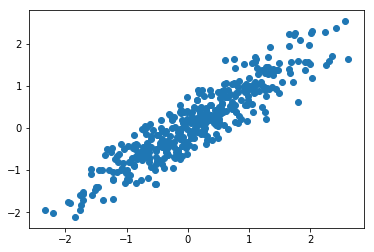

In [188]:
plt.scatter(y_test, y_pred)

In [189]:
lm = LinearRegression()
lm.fit(df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
y_pred = lm.predict(df_test)

In [191]:
r2_score(y_test, y_pred)

0.8809900946210917

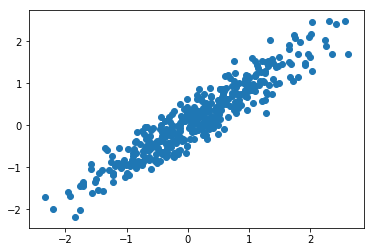

In [192]:
plt.scatter(y_test, y_pred)